In [1]:
MAKE_BOOK_FIGURES=True

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks")

def set_book_style():
    plt.style.use('seaborn-v0_8-white') 
    sns.set_style("ticks")
    sns.set_palette("deep")

    mpl.rcParams.update({
        # Font settings
        'font.family': 'serif',  # For academic publishing
        'font.size': 8,  # As requested, 10pt font
        'axes.labelsize': 8,
        'axes.titlesize': 8,
        'xtick.labelsize': 7,  # Slightly smaller for better readability
        'ytick.labelsize': 7,
        'legend.fontsize': 7,
        
        # Line and marker settings for consistency
        'axes.linewidth': 0.5,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.0,
        'lines.markersize': 4,
        
        # Layout to prevent clipped labels
        'figure.constrained_layout.use': True,
        
        # Default DPI (will override when saving)
        'figure.dpi': 600,
        'savefig.dpi': 600,
        
        # Despine - remove top and right spines
        'axes.spines.top': False,
        'axes.spines.right': False,
        
        # Remove legend frame
        'legend.frameon': False,
        
        # Additional trim settings
        'figure.autolayout': True,  # Alternative to constrained_layout
        'savefig.bbox': 'tight',    # Trim when saving
        'savefig.pad_inches': 0.1   # Small padding to ensure nothing gets cut off
    })

def set_notebook_style():
    plt.style.use('seaborn-v0_8-white')
    sns.set_style("ticks")
    sns.set_palette("deep")

    mpl.rcParams.update({
        # Font settings - using default sizes
        'font.family': 'serif',
        'axes.labelsize': 10,
        'axes.titlesize': 10,
        'xtick.labelsize': 9,
        'ytick.labelsize': 9,
        'legend.fontsize': 9,
        
        # Line and marker settings
        'axes.linewidth': 0.5,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.0,
        'lines.markersize': 4,
        
        # Layout settings
        'figure.constrained_layout.use': True,
        
        # Remove only top and right spines
        'axes.spines.top': False,
        'axes.spines.right': False,
        
        # Remove legend frame
        'legend.frameon': False,
        
        # Additional settings
        'figure.autolayout': True,
        'savefig.bbox': 'tight',
        'savefig.pad_inches': 0.1
    })

def save_for_book(fig, filename, is_vector=True, **kwargs):
    """
    Save a figure with book-optimized settings.
    
    Parameters:
    -----------
    fig : matplotlib figure
        The figure to save
    filename : str
        Filename without extension
    is_vector : bool
        If True, saves as vector at 1000 dpi. If False, saves as raster at 600 dpi.
    **kwargs : dict
        Additional kwargs to pass to savefig
    """    
    # Set appropriate DPI and format based on figure type
    if is_vector:
        dpi = 1000
        ext = '.pdf'
    else:
        dpi = 600
        ext = '.tif'
    
    # Save the figure with book settings
    fig.savefig(f"{filename}{ext}", dpi=dpi, **kwargs)

def make_full_width_fig():
    return plt.subplots(figsize=(4.7, 2.9), constrained_layout=True)

def make_half_width_fig():
    return plt.subplots(figsize=(2.35, 1.45), constrained_layout=True)

if MAKE_BOOK_FIGURES:
    set_book_style()
else:
    set_notebook_style()

make_full_width_fig = make_full_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()
make_half_width_fig = make_half_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()

# Sampling Estimates of Variance

The Monte Carlo method can be used to estimate the variance of a quantity of interest, e.g.,

$$
V = \mathbb{V}[g(X)],
$$

where $g(x)$ and $X$ are as defined in the previous page.
The idea is to express the variance using expectations.
Recall that:

$$
V = \mathbb{V}[g(X)] = \mathbb{E}[g^2(X)] - \left(\mathbb{E}[g(X)]\right)^2.
$$

We already know how to estimate the last term; see the definition of $\bar{I}_N$ in the previous subsection.
Consider the random variables $g^2(X_1),g^2(X_2),\dots$ to approximate the other term.
These are independent and identically distributed, so by the law of large numbers, we get that:

$$
\frac{g^2(X_1)+\dots+g^2(X_N)}{N}\rightarrow \mathbb{E}[g^2(X)]\;\text{a.s.}
$$

Putting everything together, we get that:

$$
\bar{V}_N = \frac{1}{N}\sum_{i=1}^Ng^2(X_i) - \bar{I}_N^2\rightarrow V\;\text{a.s.}
$$

```{note}
We have constructed a biased estimator of the variance.
This means that the expected value of the estimator is not equal to the true variance.
The formula for the unbiased estimator is:

$$
\bar{V}_N = \frac{1}{N-1}\sum_{i=1}^N\left[g(X_i) - \bar{I}_N\right]^2.
$$

However, the biased estimator is more commonly used in practice.
And it is essentially the same as the unbiased estimator when $N$ is large.
If you want to learn more about unbiased estimators, see [this Wikipedia article](https://en.wikipedia.org/wiki/Bias_of_an_estimator).
You learn about things like this in a course on mathematical statistics.
```

## Example: 1D variance

Let's try it out with the same example as before (Example 3.4 of Robert & Casella (2004)).
Assume that $X\sim\mathcal{U}([0,1])$ and pick:

$$
g(x) = \left(\cos(50x) + \sin(20x)\right)^2.
$$

The correct value for the variance is:

$$
\mathbb{V}[g(X)] \approx 1.093.
$$

Let's find a sampling average estimate of the variance:

In [2]:
import numpy as np

# Define the function
g = lambda x: (np.cos(50 * x) + np.sin(20 * x)) ** 2

# Number of samples to take
N = 100
# Generate samples from X
x_samples = np.random.rand(N)
# Get the corresponding Y's
y_samples = g(x_samples)
# Evaluate the sample average E[g(X)] for all sample sizes
I_running = np.cumsum(y_samples) / np.arange(1, N + 1)
# Evaluate the sample average for E[g^2(X)] for all sample sizes
I2_running = np.cumsum(y_samples ** 2) / np.arange(1, N + 1)
# Build the sample average for V[g(X)]
V_running = I2_running - I_running ** 2

Plot a running estimate of the variance:

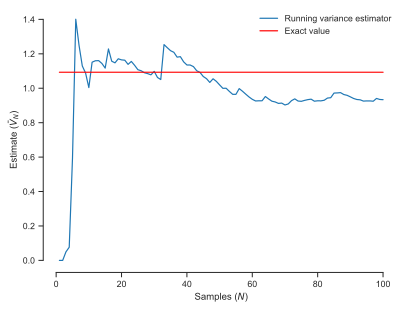

In [3]:
fig, ax = plt.subplots()
ax.plot(np.arange(1, N+1), V_running, label="Running variance estimator")
ax.plot(np.arange(1, N+1), [1.093] * N, color='r', label="Exact value")
ax.set_xlabel(r"Samples ($N$)")
ax.set_ylabel(r"Estimate ($\bar{V}_N$)")
plt.legend(loc="best", frameon=False)
sns.despine(trim=True);


## Questions

+ Increase ``N`` until you get an answer close enough to the correct answer (the red line).
+ Reduce ``N`` back to a small number, say 1,000. Run the code 2-3 times to observe that you get a slightly different answer every time.